## importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Application record


* `ID`: Unique Id of the row
* `CODE_GENDER`: Gender of the applicant. M is male and F is female.
* `FLAG_OWN_CAR`: Is an applicant with a car. Y is Yes and N is NO.
* `FLAG_OWN_REALTY`: Is an applicant with realty. Y is Yes and N is No.
* `CNT_CHILDREN`: Count of children.
* `AMT_INCOME_TOTAL`: the amount of the income.
* `NAME_INCOME_TYPE`: The type of income (5 types in total).
* `NAME_EDUCATION_TYPE`: The type of education (5 types in total).
* `NAME_FAMILY_STATUS`: The type of family status (6 types in total).
* `DAYS_BIRTH`: The number of the days from birth (Negative values).
* `DAYS_EMPLOYED`: The number of the days from employed (Negative values). This column has **error values**.
* ` FLAG_MOBIL`: Is an applicant with a mobile. 1 is True and 0 is False.
* ` FLAG_WORK_PHONE`: Is an applicant with a work phone. 1 is True and 0 is False.
* `FLAG_PHONE`: Is an applicant with a phone. 1 is True and 0 is False.
* `FLAG_EMAIL`: Is an applicant with a email. 1 is True and 0 is False.
* ` OCCUPATION_TYPE`: The type of occupation (19 types in total). This column has **missing values**.
* ` CNT_FAM_MEMBERS`: The count of family members.

In [2]:
application_record=pd.read_csv('application_record.csv')

In [3]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


There are many duplicate rows in application csv. They have same values in rows expect ID.

In [4]:
application_record.loc[application_df.DAYS_EMPLOYED==-1194].loc[application_df.DAYS_BIRTH== -10554]

NameError: name 'application_df' is not defined

In [ ]:
application_record= application_df.drop_duplicates(subset=application_df.columns[1:], keep='first', inplace=False)
application_record.loc[application_df.DAYS_BIRTH== -10554]

In [ ]:
application_record.loc[application_df.DAYS_EMPLOYED==-1194].loc[application_df.DAYS_BIRTH== -10554]

### Credit record


This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.

After reading the data, we have the following columns.

* `ID`: Unique Id of the row in application record.
* `MONTHS_BALANCE`: The number of months from record time.
* `STATUS`: Credit status for this month.
        X: No loan for the month
        C: paid off that month 
        0: 1-29 days past due 
        1: 30-59 days past due 
        2: 60-89 days overdue
        3: 90-119 days overdue 
        4: 120-149 days overdue 
        5: Overdue or bad debts, write-offs for more than 150 days 


In [6]:
credit_record=pd.read_csv('credit_record.csv')

In [7]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [8]:
credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [9]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [11]:
application_record.head().T

,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


In [13]:
application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

## Deal with the missing values

In [14]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
application_record.isnull().sum()/len(application_record)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [19]:
application_record['OCCUPATION_TYPE'].value_counts()

Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [35]:
#plt.figure(figsize=(15,8))
#sns.countplot(x='OCCUPATION_TYPE',data=application_record.value_counts(),hue='NAME_EDUCATION_TYPE')

In [36]:
application_record.drop('OCCUPATION_TYPE',axis=1,inplace=True)

## Credit Data

In [37]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


how many costomers are there when costmer had no load

In [43]:
credit_record.loc[credit_record['STATUS']=='X'].shape[0]/len(credit_record)*100

19.95374675154376

In [51]:
credit_record.loc[credit_record['STATUS']=='X'].shape[0]

209230

how many customers instances are there when customers had paid off

In [53]:
credit_record[credit_record['STATUS']=='C'].shape[0]/len(credit_record)*100

42.1554013780607

So we are left with approx 40% customer months when a customer credit score 0 to 5. looks like a fairly balanced data

it is balanced if you cosider all codes 0 to 5 as belonging to another class(default)

In [57]:
credit_record['STATUS'].value_counts()/len(credit_record)*100

C    42.155401
0    36.537205
X    19.953747
1     1.057626
5     0.161457
2     0.082779
3     0.030518
4     0.021267
Name: STATUS, dtype: float64

In [60]:
defaulter_codes=['0','1','2','3','4','5']

In [61]:
credit_record['label']=np.where(credit_record.STATUS.isin(defaulter_codes), 1,0)

In [71]:
credit_record['label'].value_counts()

0    651261
1    397314
Name: label, dtype: int64

In [72]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS,label
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,1
3,5001711,-3,0,1
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [74]:
credit_record.drop('STATUS',axis=1,inplace=True)

In [75]:
credit_record.head()

,ID,MONTHS_BALANCE,label
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0


## Concat customer_record with application_record

In [76]:
print('application_record',application_record.shape)
print('credit_record',credit_record.shape)

application_record (438557, 17)
credit_record (1048575, 3)


In [77]:
record=pd.merge(credit_record,application_record, on="ID",how='left')

In [78]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5001711,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001711,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001711,-2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001711,-3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001712,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
record.isnull().sum()

ID                          0
MONTHS_BALANCE              0
label                       0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
CNT_FAM_MEMBERS        270860
dtype: int64

In [80]:
record.dropna(inplace=True)

In [81]:
record.head()

,ID,MONTHS_BALANCE,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


In [83]:
record.shape

(777715, 19)

In [84]:
record['label'].value_counts()

0    475486
1    302229
Name: label, dtype: int64

# Data Visualization

In [85]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'label', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

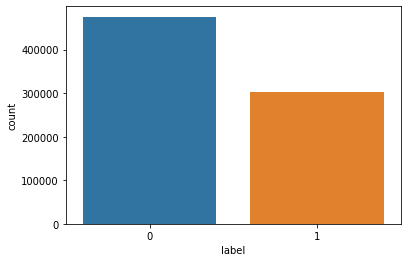

In [89]:
sns.countplot(x='label',data=record)

<AxesSubplot:xlabel='CODE_GENDER'>

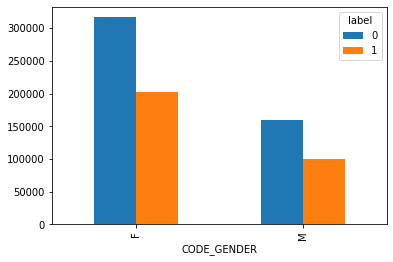

In [93]:
pd.crosstab(record.CODE_GENDER,record.label).plot(kind='bar')